# **Heart Disease Prediction**

 _   _ _____    _    ____ _____   ____ ___ ____  _____    _    ____  _____ 
| | | | ____|  / \  |  _ \_   _| |  _ \_ _/ ___|| ____|  / \  / ___|| ____|
| |_| |  _|   / _ \ | |_) || |   | | | | |\___ \|  _|   / _ \ \___ \|  _|  
|  _  | |___ / ___ \|  _ < | |   | |_| | | ___) | |___ / ___ \ ___) | |___ 
|_| |_|_____/_/   \_\_| \_\|_|   |____/___|____/|_____/_/   \_\____/|_____|
                                                                           

Random Forest Classifier Practical



Saving heart.csv to heart (2).csv

Dataset Preview:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       15 non-null     int64  
 1   sex       15 non-null     int64  
 2   cp        15 non-null     int64  
 3   trestbps  15 non-null     int64  
 4   chol      15 non-null     int64  
 5   fbs       15 non-null     int64  
 6   restecg   15 non-null     int64  
 7   thalach   15 non-null     int64  
 8   exang     15 non-null     int64  
 9   oldpeak   15 non-null     float64
 10  slope     15 non-null     int64  
 11  ca        15 non-null     int64  
 12  thal      15 non-null     int64  
 13  target    15 non-null     int64  
dtypes: float64(1), int64(13)
memory usage: 1.8 KB

Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target  

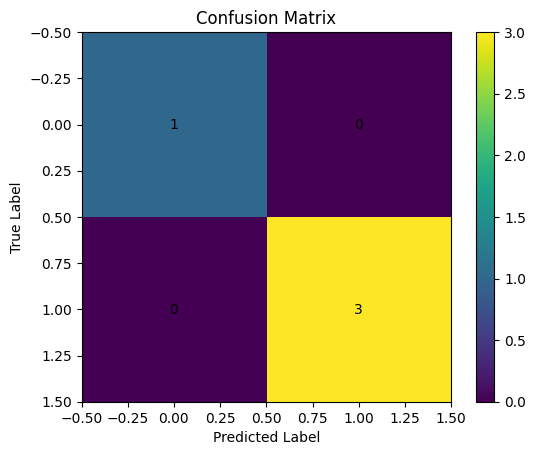

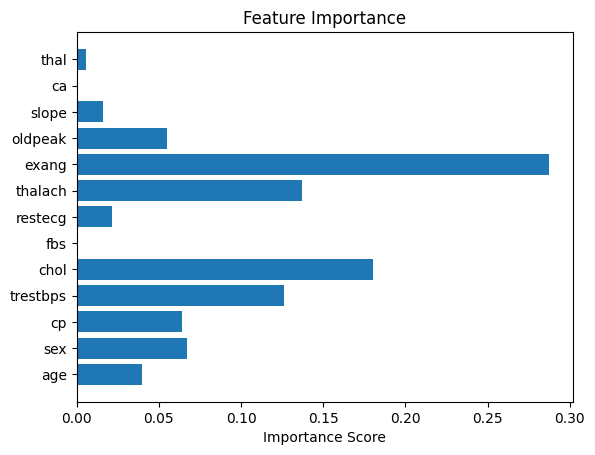

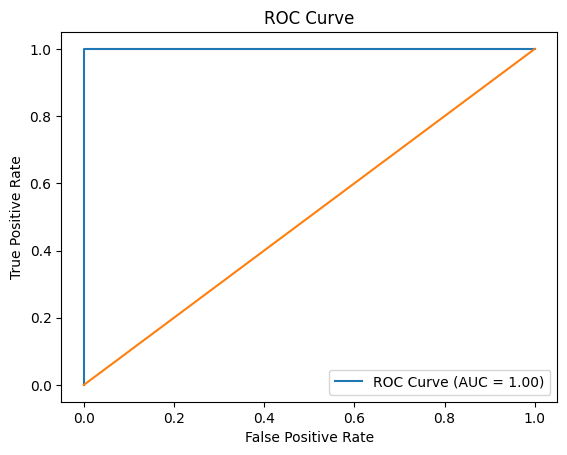

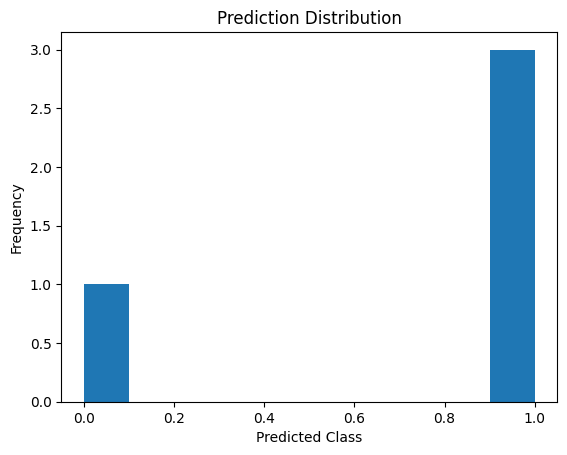

  ____ ___  __  __ ____  _     _____ _____ _____ ____  
 / ___/ _ \|  \/  |  _ \| |   | ____|_   _| ____|  _ \ 
| |  | | | | |\/| | |_) | |   |  _|   | | |  _| | | | |
| |__| |_| | |  | |  __/| |___| |___  | | | |___| |_| |
 \____\___/|_|  |_|_|   |_____|_____| |_| |_____|____/ 
                                                       

✅ Random Forest Heart Disease Prediction Successfully Executed!


In [3]:
# 🔹 Install ASCII library
!pip install pyfiglet

import pyfiglet

# BIG ASCII START BANNER
start_banner = pyfiglet.figlet_format("HEART DISEASE")
print(start_banner)
print("Random Forest Classifier Practical\n")

# 1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

# 2. Upload Dataset
from google.colab import files
uploaded = files.upload()

# Load CSV file
df = pd.read_csv(list(uploaded.keys())[0])

# Display dataset
print("\nDataset Preview:")
display(df.head())

# 3. Dataset Information
print("\nDataset Info:")
df.info()

print("\nMissing Values:")
print(df.isnull().sum())

# 4. Feature Selection
X = df.drop('target', axis=1)
y = df['target']

# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

print("\nTraining Samples:", X_train.shape)
print("Testing Samples:", X_test.shape)

# 6. Random Forest Model
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42
)

rf.fit(X_train, y_train)

# 7. Prediction
y_pred = rf.predict(X_test)

# 8. Model Evaluation
accuracy = accuracy_score(y_test, y_pred)

# BIG ASCII RESULT
result_banner = pyfiglet.figlet_format("RESULT")
print(result_banner)

print("Model Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 9. Confusion Matrix (Graph)
cm = confusion_matrix(y_test, y_pred)

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.colorbar()

for i in range(len(cm)):
    for j in range(len(cm)):
        plt.text(j, i, cm[i][j], ha="center", va="center")

plt.show()

# 10. Feature Importance Graph
importances = rf.feature_importances_
features = X.columns

plt.figure()
plt.barh(features, importances)
plt.xlabel("Importance Score")
plt.title("Feature Importance")
plt.show()

# 11. ROC Curve
y_prob = rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label="ROC Curve (AUC = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# 12. Prediction Distribution Graph
plt.figure()
plt.hist(y_pred)
plt.title("Prediction Distribution")
plt.xlabel("Predicted Class")
plt.ylabel("Frequency")
plt.show()

# BIG ASCII END BANNER
end_banner = pyfiglet.figlet_format("COMPLETED")
print(end_banner)
print("✅ Random Forest Heart Disease Prediction Successfully Executed!")
